### Librerire necessarie:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Importo i dati della protezione civile

In [2]:
dati = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

#stampo colonne per debug
for col in dati.columns:print(col)

data
stato
ricoverati_con_sintomi
terapia_intensiva
totale_ospedalizzati
isolamento_domiciliare
totale_positivi
variazione_totale_positivi
nuovi_positivi
dimessi_guariti
deceduti
casi_da_sospetto_diagnostico
casi_da_screening
totale_casi
tamponi
casi_testati
note


In [3]:
# semplifico il formato della data
dati['data']=pd.to_datetime(dati['data']).dt.strftime('%Y-%m-%d') 

## Calcolo: Nuovi tamponi

Il dato dei tamponi è espresso in maniera cumulata. Per avere i nuovi tamponi effettuati rispetto al giorno precedente calcolo la colonna **nuovi_tamponi** come differenza rispetto al giorno precedente.

In [4]:
dati['nuovi_tamponi']=dati['tamponi'].diff(1)

e ne faccio il grafico

<Figure size 432x288 with 0 Axes>

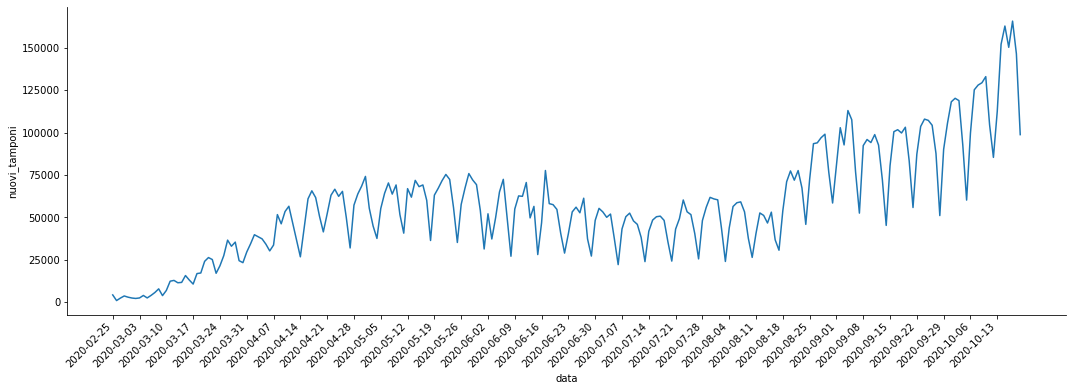

In [5]:
plt.figure()
g=sns.relplot(
    x="data", y="nuovi_tamponi", # <----------la riga che ti interessa leggere
    kind="line", data=dati, 
    height=5, aspect=3);
g.set_xticklabels(step=7, rotation=45, horizontalalignment='right')

## Nuovi casi testati

Come sopra, anche il dato **casi testati** è dato in maniera cumulata. Calcolo il dato giornaliero dei casi testati.

Come spiegato dall'admin **umbros** qui [#864](https://github.com/pcm-dpc/COVID-19/issues/864#issuecomment-710067361): 

_i casi testati sono i singoli casi testati che possono aver fatto 1 o più tamponi. Il numero dei tamponi, invece, rappresenta il totale dei tamponi effettuati che può esser fatto anche più di una volta su una persona._

In [6]:
dati['nuovi_casi']=dati['casi_testati'].diff(1)

Notare che la colonna dei casi testati è stata aggiunta ad Aprile, quindi dopo quell'[articolo del Sole 24 Ore](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF?fbclid=IwAR18yJLm8R442Fl5Z-_IuGuHUQybxME1q48EAc07eaRy1y_iOLpwOzZgIUk) che suggeriva di guardare la colonna **variazione_totale_positivi**.

<Figure size 432x288 with 0 Axes>

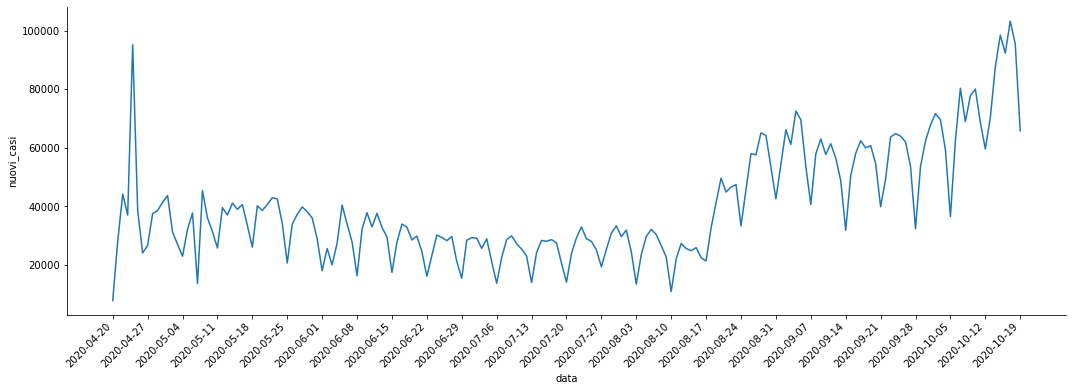

In [7]:
plt.figure()
g=sns.relplot(
    x="data", y="nuovi_casi", # <----------
    kind="line", data=dati, 
    height=5, aspect=3);
g.set_xticklabels(step=7, rotation=45, horizontalalignment='right')

Faccio il grafico delle due colonne calcolate **nuovi casi** e **nuovi tamponi** assieme alla colonna già presente nei dati **nuovi positivi**

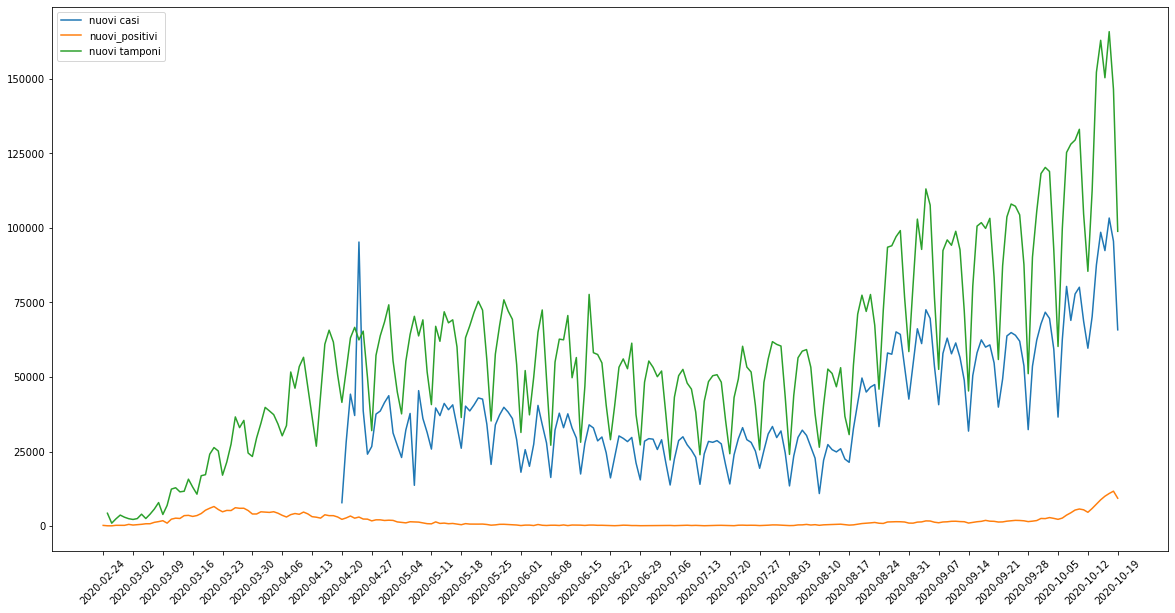

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
x = dati['data']
y1 = dati['nuovi_casi']
y2 = dati['nuovi_positivi']
y3 = dati['nuovi_tamponi']
ax.plot(x,y1, label='nuovi casi')
ax.plot(x,y2, label='nuovi_positivi')
ax.plot(x,y3, label='nuovi tamponi')
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::7])
plt.show()

I tamponi ovviamente sono più dei nuovi casi perché al loro interno ci sono anche i controlli.
Il numero di tamponi negativi è la differenza tra il numero dei tamponi di un giorno e i nuovi casi di quel giorno.

In [9]:
dati['tamponi_negativi']=dati['nuovi_tamponi']-dati['nuovi_casi']

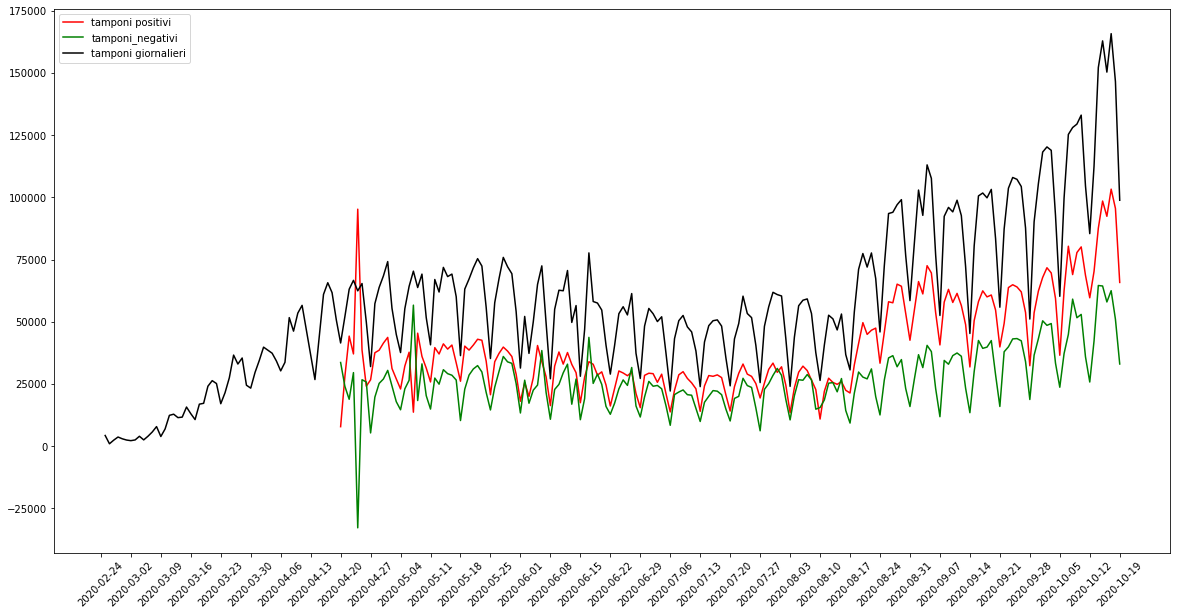

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
x = dati['data']
y1 = dati['nuovi_casi']
y2 = dati['tamponi_negativi']
y3 = dati['nuovi_tamponi']
ax.plot(x,y1,'r', label='tamponi positivi')
ax.plot(x,y2,'g', label='tamponi_negativi')
ax.plot(x,y3,'k', label='tamponi giornalieri')
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::7])
plt.show()

Ora se prendo quello che stando al mio ragionamento sono i tamponi positivi, osservo che la colonna **nuovi positivi** è sempre una frazione dei tamponi positivi. Il motivo è che un numero relativamente grande di tamponi sono i controlli non ancora negativizzati.

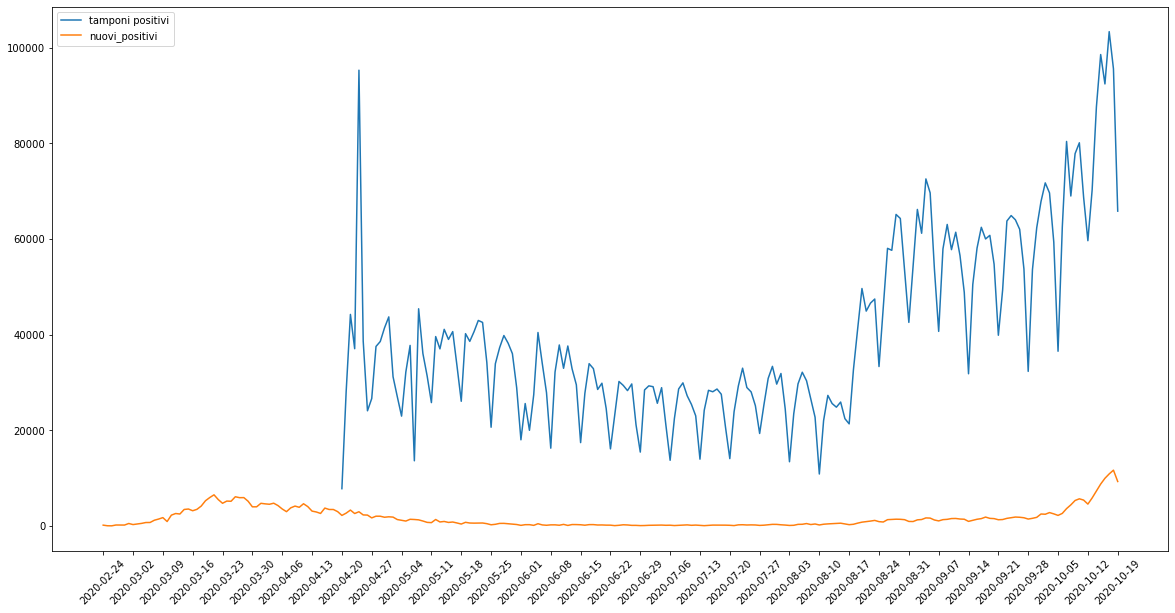

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
x = dati['data']
y1 = dati['nuovi_casi'] # aka tamponi positivi
y2 = dati['nuovi_positivi']

ax.plot(x,y1, label='tamponi positivi')
ax.plot(x,y2, label='nuovi_positivi')

ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::7])
plt.show()

Visto che abbiamo (credo) i numeri, possiamo graficare il rapporto percentuale dei nuovi positivi con il numero dei tamponi positivi trovati in una giornata.

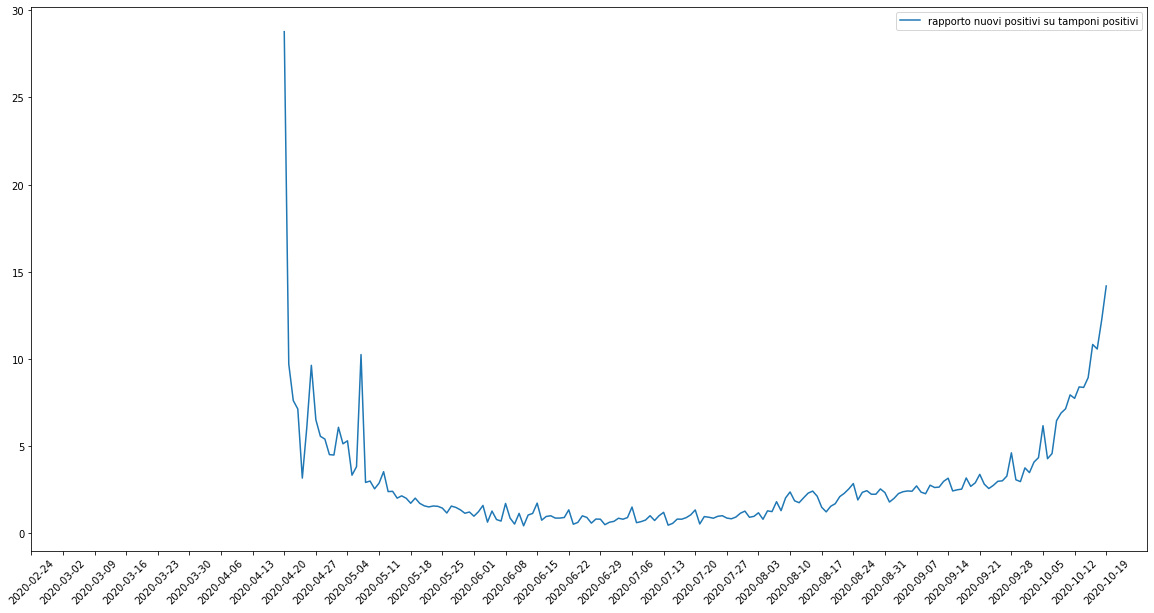

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
x = dati['data']
y1 = dati['nuovi_positivi']/dati['nuovi_casi']*100

ax.plot(x,y1, label='rapporto nuovi positivi su tamponi positivi')


ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::7])
plt.show()

Per me dal grafico sopra si vede molto bene che ad Aprile si facevano i tamponi solo ai positivi e ai fortemente sospetti. In estate c'era un gran numero di tamponi di controllo e se ne trovavano pochi di nuovi. Ora per ogni 100 tamponi effettuati si stanno trovando molti più positivi rispetto a quest'estate.

Stando sempre a [#864](https://github.com/pcm-dpc/COVID-19/issues/864) questa rapprensenta una stima in eccesso della percentuale di nuovi tamponi positivi trovati.
Per completezza calcolo anche l'altra versione, ossia la variazione giornaliera dei casi totali sulla variazione dei tamponi, che a loro dire è una sottostima.

Dato che la verità sta nel mezzo, calcolo il valor medio per ogni punto per le due curve e lo aggiungo al grafico.

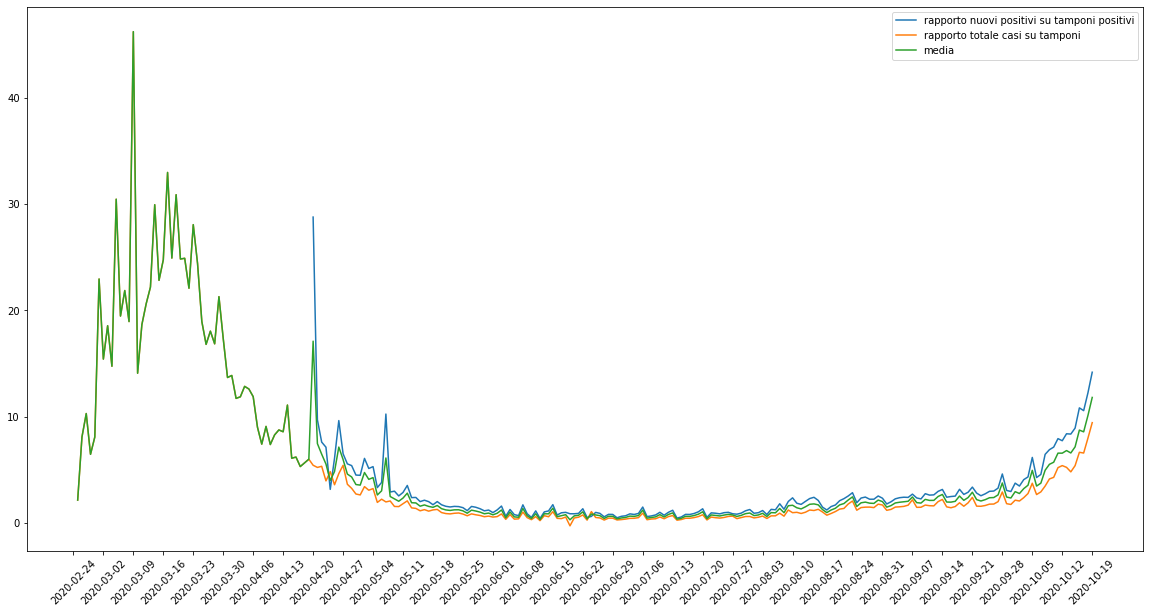

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
x = dati['data']
y1 = dati['nuovi_positivi']/dati['nuovi_casi']*100
y2 = dati['totale_casi'].diff(1)/dati['tamponi'].diff(1)*100

d={"sovrastima": dati['nuovi_positivi']/dati['nuovi_casi']*100,
  "sottostima":dati['totale_casi'].diff(1)/dati['tamponi'].diff(1)*100}
df = pd.DataFrame(d)
y3=df.mean(axis=1)

ax.plot(x,y1, label='rapporto nuovi positivi su tamponi positivi')
ax.plot(x,y2, label='rapporto totale casi su tamponi')
ax.plot(x,y3, label='media')

ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(ax.get_xticks()[::7])
plt.show()

## Conclusioni

* effettivamente con i dati forniti non si può calcolare con precisione la percentuale di nuovi tamponi positivi escludendo i controlli
* si può tuttavia fare una stima che con i dati di oggi è compresa tra:


In [58]:
up = y1.iloc[-1]
lo = y2.iloc[-1]
avg = y3.iloc[-1]
var = (up-lo)/2.0
print('Tamponi positivi = %5.2f±%5.2f %%'%(avg, var))

Tamponi positivi = 11.82± 2.37 %
